# ----- Tide Gauge (TG) data  analysis ----- 

## Load "Pyferret" to Jupyter-notebook.

In [8]:
%load_ext ferretmagic

The ferretmagic extension is already loaded. To reload it, use:
  %reload_ext ferretmagic


## Load Tide gauge data.

In [5]:
%%ferret
use Data/TG/Antarctica_d127.nc
use Data/TG/Gan_d109.nc
use Data/TG/Kanton_d013.nc
use Data/TG/Padang_d107.nc
use Data/TG/Gan_d109_hourly.nc

## ! -----  Plot the TG loctions  ----- !

! Enter_GO basemap x=20:200 y=-75:40
! Exit_GO
! Enter_GO land 7
! Exit_GO


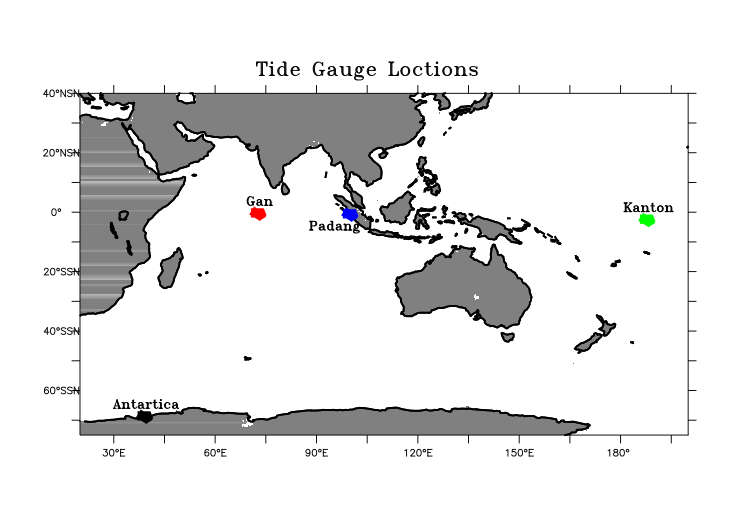

In [7]:
%%ferret
set win/asp=.7

go basemap x=20:200 y=-75:40 ; go land 7  ! plot map

plot/vs/over/nolab/thick=10/sym=88/color=black lon[d=1],lat[d=1]
plot/vs/over/nolab/thick=10/sym=88/color=red   lon[d=2],lat[d=2]
plot/vs/over/nolab/thick=10/sym=88/color=green lon[d=3],lat[d=3]
plot/vs/over/nolab/thick=10/sym=88/color=blue  lon[d=4],lat[d=4]

label `lon[d=1]`,`lat[d=1]+3`,0,0,0.13 @TRAntartica
label `lon[d=2]`,`lat[d=2]+3`,0,0,0.13 @TRGan
label `lon[d=3]`,`lat[d=3]+3`,0,0,0.13 @TRKanton
label `lon[d=4]-5`,`lat[d=4]-5`,0,0,0.13 @TRPadang
label 105,46,0,0,0.2 @TRTide Gauge Loctions

##  ---          Gan tide gauge  ---
##  ----  Compare Hourly and Daily TG data ---- !


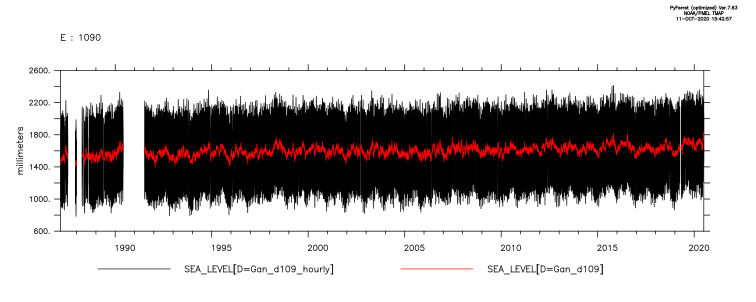

In [14]:
%%ferret
set win/asp=.4
plot sea_level[d=5],sea_level[d=2]

##  ----  Restrict the time for a Year ---- !


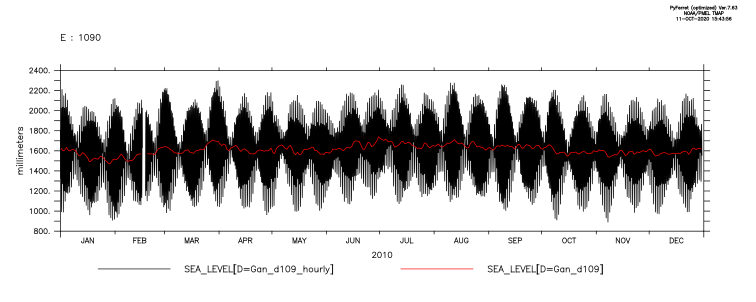

In [16]:
%%ferret
set win/asp=.4
plot/t=01-jan-2010:31-dec-2010 sea_level[d=5],sea_level[d=2] 

##  ----  Restrict the time for a month ---- !


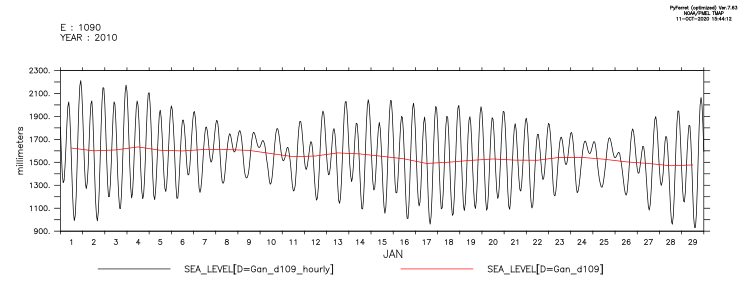

In [17]:
%%ferret
set win/asp=.4
plot/t=01-jan-2010:30-Jan-2010 sea_level[d=5],sea_level[d=2]

## ! ---- Calculating amplitude Spectum  ------- !

### to check how hourly and daily data are different 

In [18]:
%%ferret
define axis/t="04-MAR-1987 10:00":"30-JUN-2020 22:00":1/units=hours tax
define grid/t=tax grd
let Gan_hr = sea_level[d=5,g=grd]

let Ga_Hr_ffta = ffta(Gan_hr[l=10:292100@fln:3]) ; let G_Hr = 1/(t[gt=Ga_Hr_ffta]*24)
let Ga_dy_ffta = ffta(sea_level[d=2,l=@fln:3]) ; let G_dy = 1/t[gt=Ga_dy_ffta]


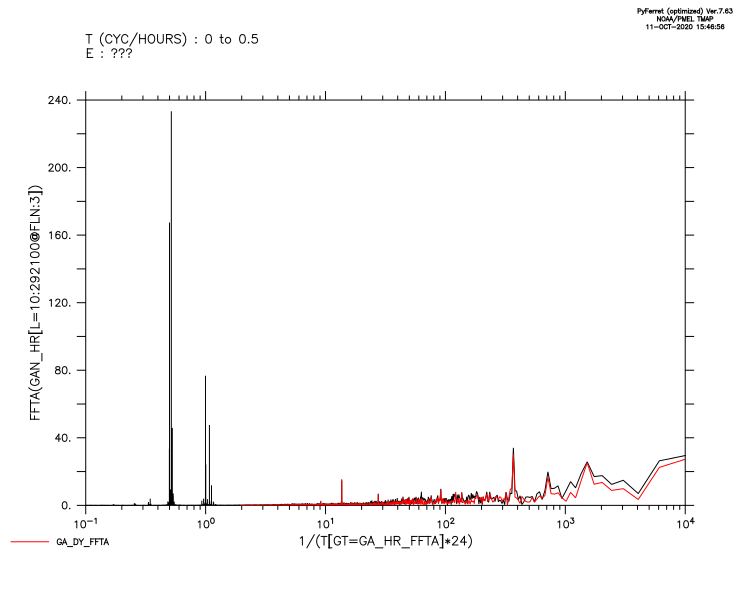

In [19]:
%%ferret
set win/asp=0.8

plot/vs/line/color=black/hlimit=0.08:6000/hlog  G_hr,Ga_hr_ffta
plot/vs/line/color=red/hlog/over                G_dy,Ga_dy_ffta

## ! -----  Plot the evolution of daily sea level from all 4 TG   ----- !


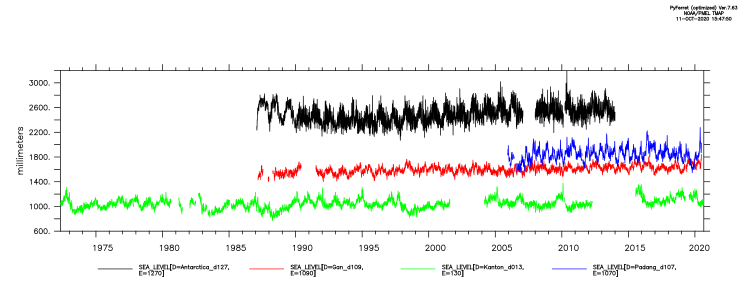

In [25]:
%%ferret
set win/asp=.4
plot sea_level[d=1],sea_level[d=2],sea_level[d=3],sea_level[d=4]


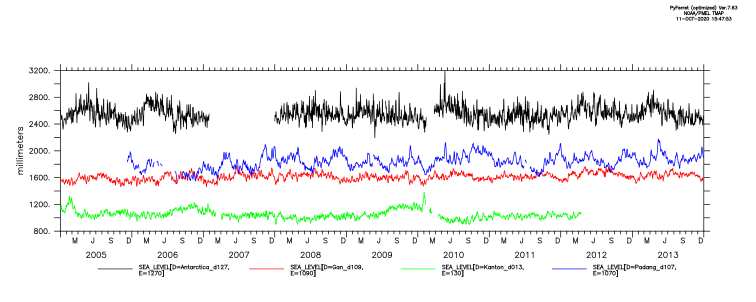

In [26]:
%%ferret
set win/asp=.4
plot/t=01-jan-2005:31-dec-2013 sea_level[d=1],sea_level[d=2],sea_level[d=3],sea_level[d=4]


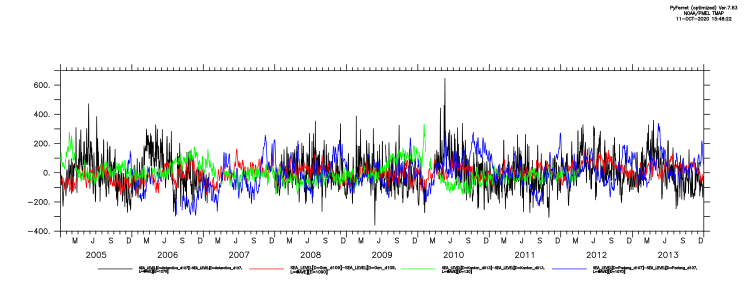

In [28]:
%%ferret
set win/asp=.4
plot/t=01-jan-2005:31-dec-2013 sea_level[d=1]-sea_level[d=1,l=@ave],sea_level[d=2]-sea_level[d=2,l=@ave],sea_level[d=3]-sea_level[d=3,l=@ave],sea_level[d=4]-sea_level[d=4,l=@ave]


## ! ---- Calculating amplitude Spectum  ------- !

In [32]:
%%ferret
let Antartica = sea_level[d=1]-sea_level[d=1,l=@ave]
let Gan       = sea_level[d=2]-sea_level[d=2,l=@ave]
let Kanton    = sea_level[d=3]-sea_level[d=3,l=@ave]
let Padang    = sea_level[d=4]-sea_level[d=4,l=@ave]

let Aa_ffta   = ffta(Antartica[l=@fln:3]) ; let A_an = 1/t[gt=Aa_ffta]
let Ga_ffta   = ffta(Gan[l=@fln:3])       ; let G_an = 1/t[gt=Ga_ffta]
let Ka_ffta   = ffta(Kanton[l=@fln:3])    ; let K_an = 1/t[gt=Ka_ffta]
let Pa_ffta   = ffta(Padang[l=@fln:3])    ; let P_an = 1/t[gt=Pa_ffta]

### ! ---- zoom a part of the amplitude spectrum  ------- !


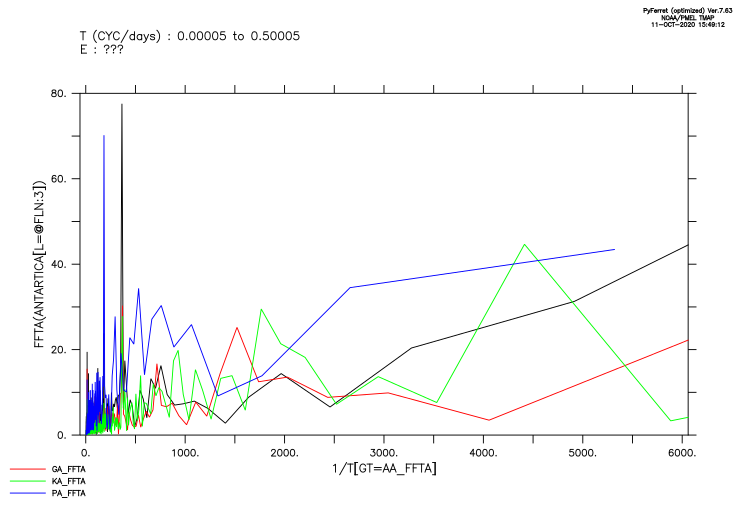

In [33]:
%%ferret
set win/asp=.7

plot/vs/line/color=black/hlimit=2:6000/vlimit=0:80  A_an,Aa_ffta
plot/vs/over/line/color=red/hlimit=2:6000           G_an,Ga_ffta
plot/vs/over/line/color=green/hlimit=2:6000         K_an,Ka_ffta
plot/vs/over/line/color=blue/hlimit=2:6000          P_an,Pa_ffta


### ! ---- zoom a part of the amplitude spectrum  ------- !


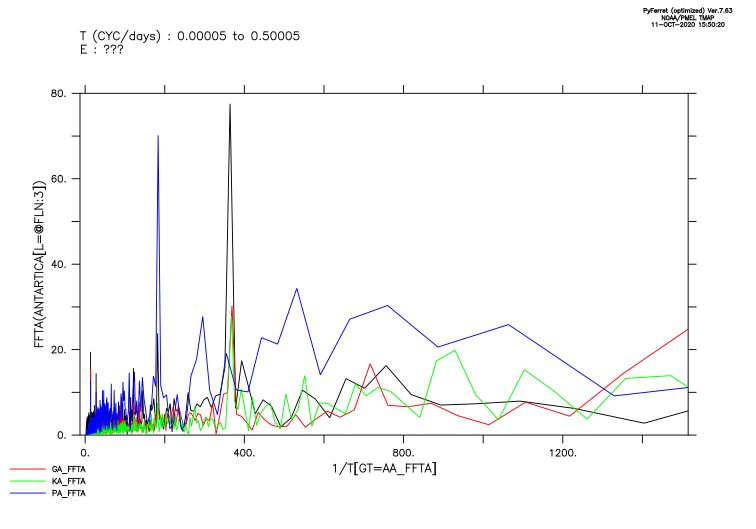

In [34]:
%%ferret
set win/asp=.7
plot/vs/line/color=black/hlimit=2:1500/vlimit=0:80      A_an,Aa_ffta
plot/vs/over/line/color=red/hlimit=2:1500   G_an,Ga_ffta
plot/vs/over/line/color=green/hlimit=2:1500 K_an,Ka_ffta
plot/vs/over/line/color=blue/hlimit=2:1500  P_an,Pa_ffta

### ! ---- zoom a part of the amplitude spectrum  ------- !


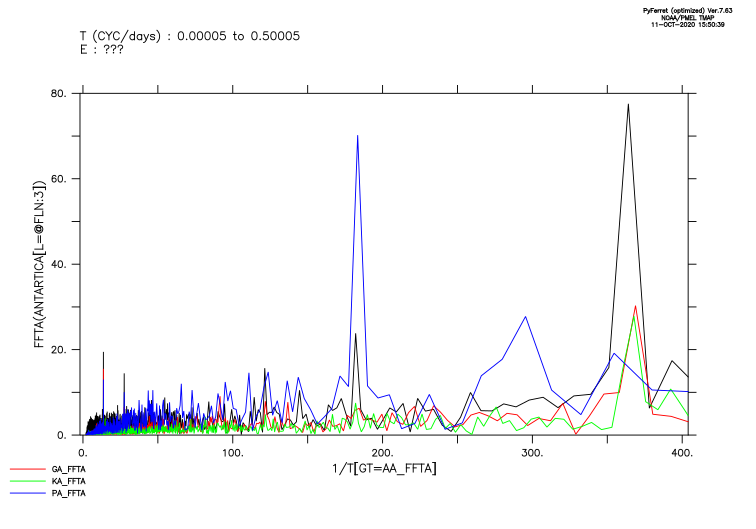

In [35]:
%%ferret
set win/asp=.7
plot/vs/line/color=black/hlimit=2:400/vlimit=0:80      A_an,Aa_ffta
plot/vs/over/line/color=red/hlimit=2:400   G_an,Ga_ffta
plot/vs/over/line/color=green/hlimit=2:400 K_an,Ka_ffta
plot/vs/over/line/color=blue/hlimit=2:400  P_an,Pa_ffta

### ! ---- smooth amplitude specturm and understand individual peaks  ------- !

### Antartica tide gauge


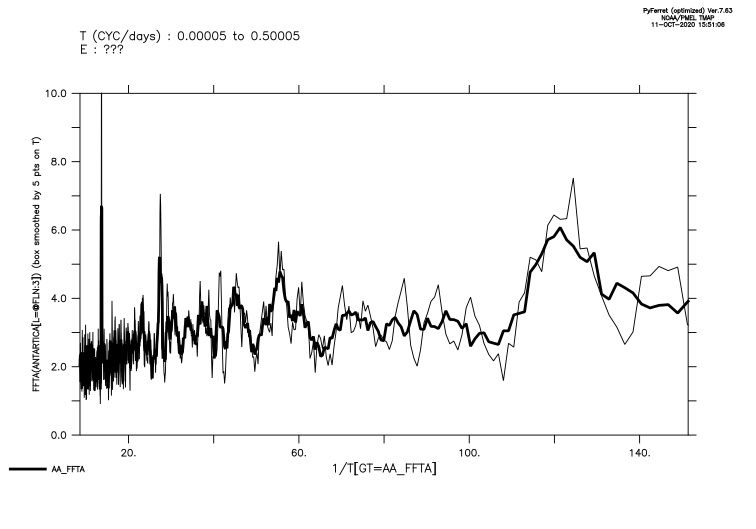

In [36]:
%%ferret
set win/asp=.7
plot/vs/line/color=black/hlimit=10:150/vlimit=0:10      A_an,Aa_ffta[l=@sbx:5]
plot/vs/line/color=black/hlimit=10:150/vlimit=0:10/over/thick=3      A_an,Aa_ffta[l=@sbx:11]

### Gan Tide gauge

In [19]:
%%ferret
set win/asp=.7
plot/vs/line/color=black/hlimit=10:150/vlimit=0:10   G_an,Ga_ffta[l=@sbx:5]
plot/vs/line/color=red/hlimit=10:150/vlimit=0:10/over/thick=3 G_an,Ga_ffta[l=@sbx:11]


yes? plot/vs/line/color=black/hlimit=10:150/vlimit=0:10 G_an,Ga_ffta[l=@sbx:5]
**ERROR: variable unknown or not in data set: G_AN

### Kanton Tide gauge


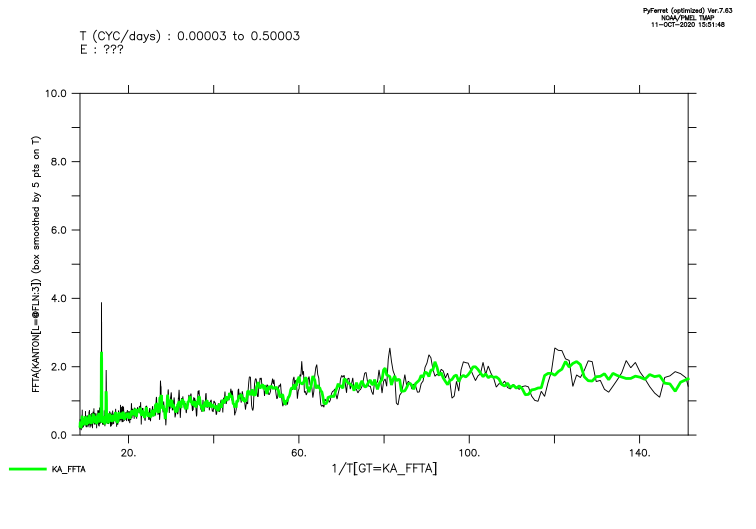

In [38]:
%%ferret
set win/asp=.7
plot/vs/line/color=black/hlimit=10:150/vlimit=0:10 K_an,Ka_ffta[l=@sbx:5]
plot/vs/over/line/color=green/hlimit=10:150/thick=3 K_an,Ka_ffta[l=@sbx:11]

### Padang tide gauge


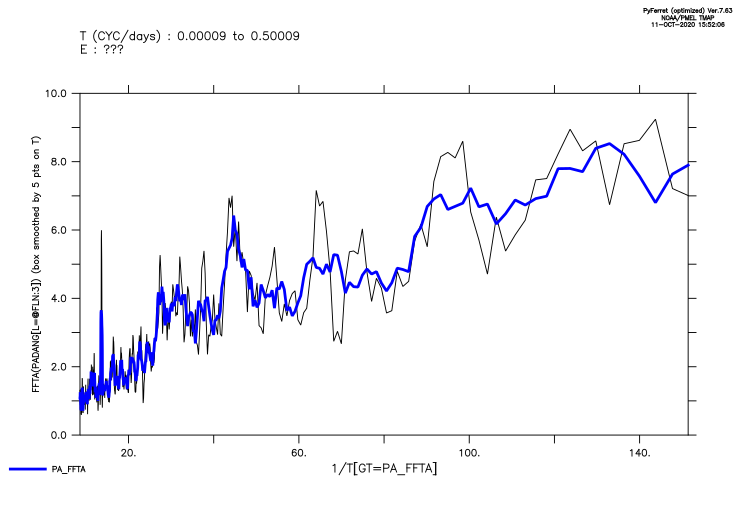

In [39]:
%%ferret
set win/asp=.7
plot/vs/line/color=black/hlimit=10:150/vlimit=0:10  P_an,Pa_ffta[l=@sbx:5]
plot/vs/over/line/color=blue/hlimit=10:150/thick=3  P_an,Pa_ffta[l=@sbx:11]